<a href="https://colab.research.google.com/github/titika2013/Training_and_gen_stable_diffusion_script_dreambooth/blob/main/Train_stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## installing required libraries
!pip install torch==1.12.1+cu113
!pip install torchvision==0.13.1+cu113
!pip install -U -qq git+https://github.com/huggingface/diffusers.git
!pip install -qq accelerate tensorboard transformers ftfy gradio
!pip install -qq "ipywidgets>=7,<8"
!pip install OmegaConf
!pip install wget
!pip install pytorch_lightning
!pip install huggingface_hub
!pip install ftfy
!pip install transformers
!pip install pyfiglet
!pip install triton==2.0.0.dev20220701
!pip install bitsandbytes
!pip install python-slugify
!pip install deepface
!pip install requests
!pip install cutlass
!pip install GPUtil
!pip install numba
!pip install https://github.com/apolinario/xformers/releases/download/0.0.3/xformers-0.0.14.dev0-cp38-cp38-linux_x86_64.whl


!git clone https://github.com/titika2013/dreambooth_train

#if grid ai to comand line
# conda install -c conda-forge python
# conda install -c "conda-forge/label/cf201901" git-lfs
# conda install xformers -c xformers/label/dev
##!git lfs install


#for runpod.ai
# !pip install python-slugify
# !pip install wget
# !pip install deepface
# !pip install GPUtil
## install git lfs

In [2]:
#@title Download model
import os
 
from huggingface_hub import login
from huggingface_hub import snapshot_download


#@markdown  Insert your huggingface token, [get token](https://huggingface.co/settings/tokens)
Huggingface_Token = "" #@param{type: 'string'}
login(token = Huggingface_Token )

# choose your model
ADD_LINK = "runwayml/stable-diffusion-v1-5" #@param [ "runwayml/stable-diffusion-v1-5", "stabilityai/stable-diffusion-2-1-base"]
WHERE_SAVE_SD_MODEL =  os.getcwd()
snapshot_download(repo_id=ADD_LINK, cache_dir = os.getcwd())


Token will not been saved to git credential helper. Pass `add_to_git_credential=True` if you want to set the git credential as well.
Token is valid.
Your token has been saved to /root/.huggingface/token
Login successful


Fetching 20 files:   0%|          | 0/20 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/1.55k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/14.5k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/342 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/308 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/617 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/492M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/472 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/806 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/743 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/4.27G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/7.70G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.87k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/547 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/335M [00:00<?, ?B/s]

'/content/models--runwayml--stable-diffusion-v1-5/snapshots/63534535d4730d5976c5c647a7f2adaea1102f5b'

In [1]:
import os
# cur folder
MAIN_DIR = os.getcwd()
TRAIN_SCRIPT = "/content/dreambooth_train/train_stable_diffusion.py"
# path to sd model
model_sd_path ="/content/models--runwayml--stable-diffusion-v1-5/snapshots/63534535d4730d5976c5c647a7f2adaea1102f5b"

# A folder containing the regularization iamges
class_dir = "/content/dreambooth_train/Regularization_images/Mix"

# folder_with_user_photo - forlder with training images from 10 to 20 photos 
folder_with_user_photo = "/content/drive/MyDrive/fresh_photos"
# main dir in colab you can write /content/ or in script or it will be calculated automatically with the command os.getcwd()
main_dir = ""

# The prompt with identifier specifying your training images 
# choose key prompt like this https://arxiv.org/abs/2208.12242
key_prompt = "TIG-XXL"
# Where to save the retrained model, if nothing is specified then output_dir = main_dir + '/models/' + f"{key_prompt}_session"
output_dir = ""

!python "$TRAIN_SCRIPT" --model_sd_path "$model_sd_path" --class_dir "$class_dir"\
--folder_with_user_photo "$folder_with_user_photo" --main_dir "$main_dir" \
--key_prompt "$key_prompt" --output_dir "$output_dir"\
--class_prompt "" --seed 0 --resolution 512 \
--save_model_checkpoint_every 5000 --need_face_find False

 
 Image crop Done for 18 images
Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 |  0% | 56% |
GPU Usage after emptying the cache
| ID | GPU  | MEM |
-------------------
|  0 | 100% |  1% |
Steps: 100% 3000/3000 [51:47<00:00,  1.04s/it, loss=0.557]
Initial GPU Usage
| ID | GPU | MEM |
------------------
|  0 | 51% | 35% |
GPU Usage after emptying the cache
| ID | GPU | MEM |
------------------
|  0 |  2% |  1% |


You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


  0%|          | 0/100 [00:00<?, ?it/s]

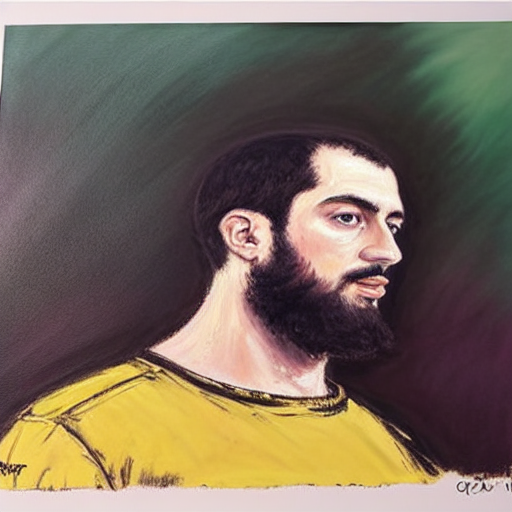

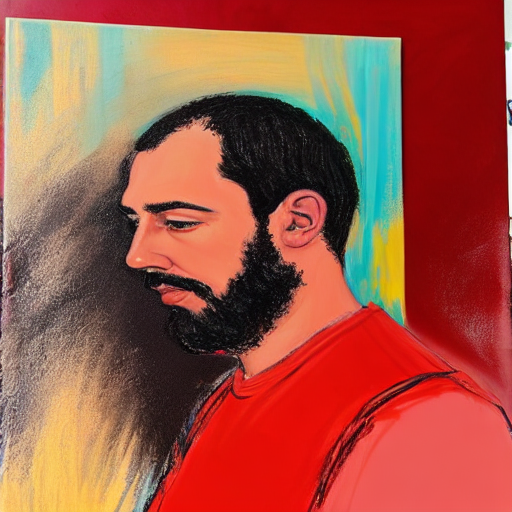

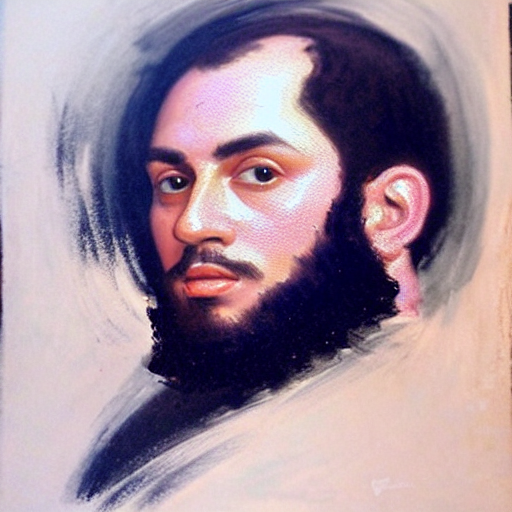

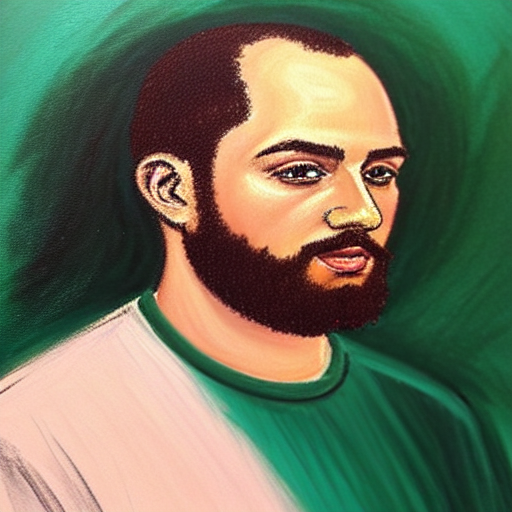

In [6]:
GEN_SCRIPT = "/content/dreambooth_train/run_sd_generator.py"
model_sd_path = "/content/models/TIG-XXL_session" # path to trained model
key_name = "TIG-XXL"
input_user_prompt = "portrait masterpiece painting by vasnetsov and surikov," \
              f" JEAN-VICTOR BERTIN, by Terence Cuneo, detailed, t artfully traced"





scheduler = "DPMSolverMultistepScheduler" #DPMSolverMultistepScheduler" or "DDIMScheduler" or "LMSDiscreteScheduler"
path_to_dest = ""
negative_prompt = "" 


%run "$GEN_SCRIPT" --model_sd_path "$model_sd_path" --token_prompt "$key_name" \
--input_user_prompt "$input_user_prompt" --save_dir "$path_to_dest" \
--negative_prompt "$negative_prompt" --num_samples 4 \
--guidance_scale 8 --num_inference_steps 100\
--resolution 512 --seed 0 --need_display True --need_add_key_prompt_to_input_user_prompt True \
--scheduler "$scheduler"